Model for late delivery

In [24]:
import pandas as pd
df_clean = pd.read_csv("../Datasets/Supply_Chain/DataCoSupplyChainDataset_clean.csv")
df_info=pd.read_csv("../Datasets/Supply_Chain/DescriptionDataCoSupplyChain.csv")

Checking before creating of a model

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Delivery_Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category_Id                    180519 non-null  int64  
 7   Category_Name                  180519 non-null  object 
 8   Customer_City                  180519 non-null  object 
 9   Customer_Country               180519 non-null  object 
 10  Customer_Id                    180519 non-null  int64  
 11  Customer_Segment               180519 non-null  object 
 12  Customer_State                

Late Delivery Fraud Detection

In [26]:
df_clean['Late_Delivery'] = df_clean['Days_for_shipment_(scheduled)'] - df_clean['Days_for_shipping_(real)']

In [27]:
df_clean['Late_Delivery_Label'] = df_clean['Late_Delivery'].map(lambda x: 1 if x >= 0 else 0)

Fields for prediction from the dataset

In [29]:
df_model_delivery = df_clean[['Type','Days_for_shipment_(scheduled)','Category_Name','Customer_Country','Customer_Segment','Order_Country','Order_Item_Quantity','Shipping_Mode','Order_State','Customer_State','Late_Delivery_Label']]

In [30]:
df_model_delivery

,Type,Days_for_shipment_(scheduled),Category_Name,Customer_Country,Customer_Segment,Order_Country,Order_Item_Quantity,Shipping_Mode,Order_State,Customer_State,Late_Delivery_Label
0,DEBIT,4,Sporting Goods,Puerto Rico,Consumer,Indonesia,1,Standard Class,Java Occidental,PR,1
1,TRANSFER,4,Sporting Goods,Puerto Rico,Consumer,India,1,Standard Class,Rajast�n,PR,0
2,CASH,4,Sporting Goods,EE. UU.,Consumer,India,1,Standard Class,Rajast�n,CA,1
3,DEBIT,4,Sporting Goods,EE. UU.,Home Office,Australia,1,Standard Class,Queensland,CA,1
4,PAYMENT,4,Sporting Goods,Puerto Rico,Corporate,Australia,1,Standard Class,Queensland,PR,1
...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,Fishing,EE. UU.,Home Office,China,1,Standard Class,Shangh�i,NY,1
180515,DEBIT,2,Fishing,EE. UU.,Corporate,Jap�n,1,Second Class,Osaka,CA,0
180516,TRANSFER,4,Fishing,EE. UU.,Corporate,Australia,1,Standard Class,Australia del Sur,CT,0
180517,PAYMENT,4,Fishing,Puerto Rico,Consumer,Australia,1,Standard Class,Australia del Sur,PR,1


Separating fields over categoriacal and numerical

In [31]:
df_model_delivery_categorical = df_model_delivery[['Type','Category_Name','Customer_Country','Customer_Segment','Order_Country','Shipping_Mode','Order_State','Customer_State']]

In [32]:
df_model_delivery_numerical = df_model_delivery[['Order_Item_Quantity','Days_for_shipment_(scheduled)','Late_Delivery_Label']]

Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [34]:
df_model_delivery_categorical_encoded = pd.DataFrame(enc.fit_transform(df_model_delivery_categorical),columns=['Type','Category_Name','Customer_Country','Customer_Segment','Order_Country','Shipping_Mode','Order_State','Customer_State'])

In [35]:
df_model_delivery_categorical_encoded

,Type,Category_Name,Customer_Country,Customer_Segment,Order_Country,Shipping_Mode,Order_State,Customer_State
0,1.0,40.0,1.0,0.0,70.0,3.0,475.0,36.0
1,3.0,40.0,1.0,0.0,69.0,3.0,841.0,36.0
2,0.0,40.0,0.0,0.0,69.0,3.0,841.0,5.0
3,1.0,40.0,0.0,2.0,8.0,3.0,835.0,5.0
4,2.0,40.0,1.0,1.0,8.0,3.0,835.0,36.0
...,...,...,...,...,...,...,...,...
180514,0.0,18.0,0.0,2.0,31.0,3.0,913.0,31.0
180515,1.0,18.0,0.0,1.0,77.0,2.0,770.0,5.0
180516,3.0,18.0,0.0,1.0,8.0,3.0,88.0,7.0
180517,2.0,18.0,1.0,0.0,8.0,3.0,88.0,36.0


In [36]:
df_model_delivery_final =  df_model_delivery_categorical_encoded.join(df_model_delivery_numerical)

In [37]:
df_model_delivery_final.shape

(180519, 11)

Final Fields for model creation

In [38]:
df_model_delivery_final

,Type,Category_Name,Customer_Country,Customer_Segment,Order_Country,Shipping_Mode,Order_State,Customer_State,Order_Item_Quantity,Days_for_shipment_(scheduled),Late_Delivery_Label
0,1.0,40.0,1.0,0.0,70.0,3.0,475.0,36.0,1,4,1
1,3.0,40.0,1.0,0.0,69.0,3.0,841.0,36.0,1,4,0
2,0.0,40.0,0.0,0.0,69.0,3.0,841.0,5.0,1,4,1
3,1.0,40.0,0.0,2.0,8.0,3.0,835.0,5.0,1,4,1
4,2.0,40.0,1.0,1.0,8.0,3.0,835.0,36.0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
180514,0.0,18.0,0.0,2.0,31.0,3.0,913.0,31.0,1,4,1
180515,1.0,18.0,0.0,1.0,77.0,2.0,770.0,5.0,1,2,0
180516,3.0,18.0,0.0,1.0,8.0,3.0,88.0,7.0,1,4,0
180517,2.0,18.0,1.0,0.0,8.0,3.0,88.0,36.0,1,4,1


In [39]:

# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [40]:
X = df_model_delivery_final.drop('Late_Delivery_Label', axis = 1).values
y = df_model_delivery_final['Late_Delivery_Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

# 7. CatBoost
cb = CatBoostClassifier(verbose=False)
cb.fit(X_train, y_train)
cb_yhat = cb.predict(X_test)

In [47]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold'],color="cyan"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold'],color="magenta"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold'],color="yellow"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the CatBoost model is {}'.format(accuracy_score(y_test, cb_yhat)), attrs = ['bold'],color="blue"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.6994515843119876
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.6418956348327055
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.6982051850210503
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.5719033902060714
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.6982051850210503
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.7059051628628407
------------------------------------------------------------------------
Accuracy score of the CatBoost model is 0.718147573676047
-----------------------------------------------

In [48]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold'],color="cyan"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold'],color="yellow"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold'],color="magenta"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the CatBoost model is {}'.format(f1_score(y_test, cb_yhat)), attrs = ['bold'],color="blue"))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.7112483035738045
------------------------------------------------------------------------
F1 score of the KNN model is 0.5815993009934953
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7057679844458847
------------------------------------------------------------------------
F1 score of the SVM model is 0.0
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7057679844458847
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.7190559348044663
------------------------------------------------------------------------
F1 score of the CatBoost model is 0.7246753246753246
------------------------------------------------------------------------


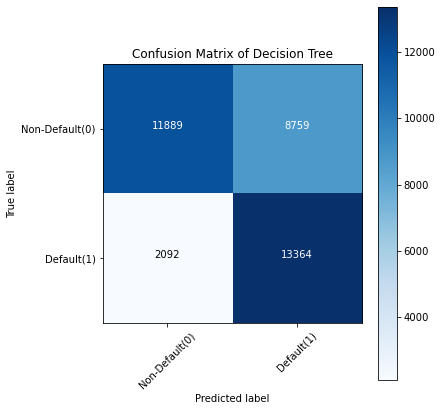

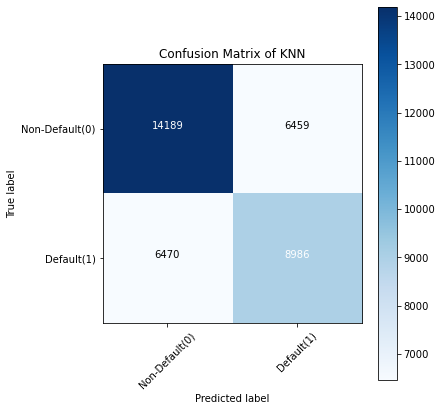

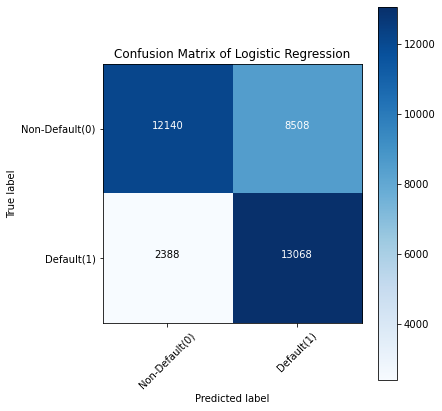

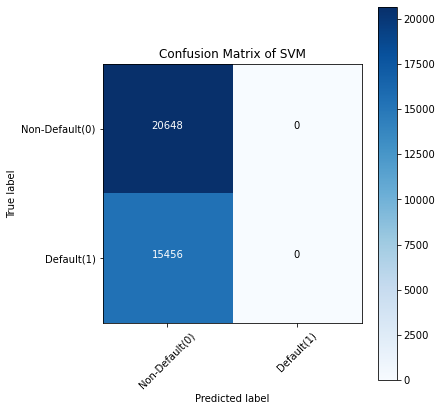

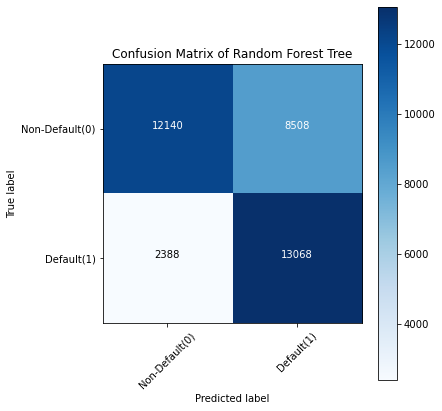

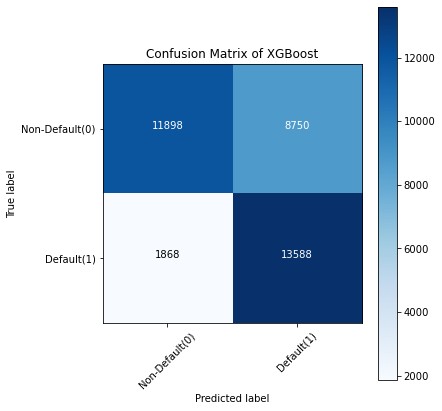

In [44]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

In [45]:
df_model_fraud = df_clean[['Type','Category_Name','Customer_Country','Customer_Segment','Order_Country','Order_Item_Quantity','Shipping_Mode','Order_State','Customer_State','Product_Price','Product_Name','Order_Status']]

In [46]:
df_clean['Order_Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order_Status, dtype: int64